<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# Análisis y procesamiento de señales
## Augusto Ojeda-Matias Carbajal TS8: Filtrado digital lineal de ECG

### Introducción teórica


En el procesamiento digital de señales, los filtros son herramientas fundamentales que permiten modificar el contenido espectral de una señal, eliminado, atenuando o amplificando determinadas componentes de frecuencia según la aplicación. Estos filtros se pueden clasificar en diversos grupos, en este informe utilizaremos dos tipos, aquellos filtros de respuesta finita al impulso o FIR y los filtros de respuesta infinita al impulso o IRR. Ambos persiguen el mismo objetivo general, modelar o alterar el comportamiento frecuencial de una señal, pero difieren en su fomulacion matematica, en su estructura de implementacion y especialmente en sus propiedades de estabilidad y fase.

Los filtros FIR se definen por tener una respuesta al impulso de duración finita, es decir despues de un número limitado de muestras, su salidad se hace exactamente cero. Su ecuacion diferencial general es:  
$$y(n)=\sum_{k=0}^{N-1}b_kx[n-k] $$
Donde b_k son los coeficientes del filtro y N es el numero de coeficientes o el orden del filtro. La transformada Z de esta ecuacion permite expresar la relacion entre la salidad y la entrada como: 
$$T(z)=\frac{Y(z)}{X(z)}=\sum_{k=0}^{N-1}b_kz^{-k} $$
Por esta razon los filtros FIR no poseen polos distintos de cero, excepto en el origen, lo que implica que son incondicionalmente estables, es decir la salida nunca crece indefinidamente, independientemente de la entrada.

En el dominio de la frecuencia, la respuesta frecuencial del filtro se obtiene evaluado la funcion transferencia sobre el ciruclo unitario $e^{j\Omega}$ obteniendo asi $$T(e^{j\Omega})=\sum_{k=0}^{N-1}b_ke^{-j\Omega k} $$ Es importante destacar que los filtros FIR pueden diseñarse con fase lineal exacta cuando sus coeficientes son simetricos osea $b_k=b_{N-1-k}$ o asimetricos $b_k=-b_{N-1-k}$, garantizando que todas las componentes de frecuencia de la señal sufran el mismo retardo de grupo constante. Esto evita la distorsión temporal, caracteristica muy valorada en aplicaciones directas. A cambio este tipo de filtros necesitan una N grande lo que implica un costo computacion alto, al tener un orden de convergencia bajo, a pesar de esto son herramientas fundamentales en sistemas donde la fidelidad temporal es primordial 

Los filtros IIR en cambio son filtros de respuesta al impulso que teoricamente nunca se anulan, debido a la presencia de retroalimentacion. Su ecuación general se expresa como: 
$$y(n)=\sum_{k=0}^{M}b_kx[n-k]-\sum_{k=0}^{N}a_ky[n-k] $$
donde los coeficientes $a_k$ representan los términos de realimentación y $b_k$ los terminos directos. Su funcion transferencia en el dominio Z, se obtiene aplicando la transformada Z, obteniendo asi 
$$T(z)=\frac{Y(z)}{X(z)}=\frac{\sum_{k=0}^{M}b_kz^{-k}}{1+\sum_{k=0}^{M}a_kz^{-k}}$$ 
Esta exprecion presenta polos y ceros, lo que permite modelar una gran variedad de respuesta en frecuencia en menor orden. En el plano Z, la estabilidad del IRR depende de la ubicacion de los polos, en general para que el sistema sea estable todos los polos se deben de encontrar dentro del circulo unitario, en el semieje izquierdo, si esto no se cumple el sistema podria crecer indefinidamente para algunas entradas 

Para obtener la respuesta en frecuencia se debe de evaluar nuevamente sobre el cirulo unitario obteniendo asi:
$$
T(z) = \frac{Y(z)}{X(z)} = \frac{\displaystyle\sum_{k=0}^{M} b_k e^{-j\Omega k}}{\displaystyle 1 + \sum_{k=0}^{M} a_k e^{-j\Omega k}}
$$
Los filtros IIR pueden lograr las mismas especificacion que un FIR pero con menos coeficientes, esto los hace que sean computacionalmente mas efectivos, a cambio la fase puede ser no lineal, generando una distorcion de fase, para eso lo ideal es realizar un doble filtrado para hacer que la fase sea constantemente 1.

### Filtros FIR diseñados por el algoritmo de Parks-McClellan:

El algoritmo de Parks-McClellan (PM) es una herramienta poderosa utilizada para diseñar filtros FIR óptimos en términos de la minimización del error máximo en las bandas de frecuencia de interés. Se entiende al error como la diferencia entre una respuesta deseada (e.g. plantilla del filtro) y la obtenida por el algoritmo PM. Es decir que éste algoritmo distribuye el error de manera acotada en toda la banda de frecuencia, razón por la cual se lo suele denominar como error de Chebyshev o equirriple. La fundamentación matemática de este algoritmo se basa en el método de la alternancia de Remez, y una búsqueda iterativa de las frecuencias extremas que acotan la señal de error, como se verá más abajo. El objetivo final es encontrar los coeficientes de un filtro FIR cuya respuesta de módulo coincide con la del filtro óptimo en el sentido minimax.

### Filtros FIR diseñados por el Algoritmo de Cuadrados Mínimos:

El algoritmo de cuadrados mínimos (LS, por sus siglas en inglés) es una técnica estadística que se utiliza para encontrar la mejor aproximación de un conjunto de datos minimizando la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. En el contexto de filtros FIR (Finite Impulse Response), el objetivo es diseñar un filtro que minimice el error entre la respuesta del filtro y una respuesta deseada.

### Análisis, desarollo y Discusión


En este informe se analizarán distintos tipos de filtros digitales con el objetivo de evaluar su desempeño en el procesamiento de una señal electrocardiográfica (ECG). Para ello, se implementarán y compararán filtros del tipo FIR y FIRLS, observando su capacidad para eliminar componentes de ruido sin distorsionar la morfología del ECG original.

Este análisis resulta de gran relevancia en el ámbito de la ingeniería biomédica, ya que la correcta atenuación de ruidos, como los generados por la actividad muscular (EMG) o interferencias eléctricas, permite obtener registros más limpios y, en consecuencia, realizar diagnósticos más precisos.

Para el desarrollo del trabajo se utilizará el archivo ECG_TP4, el cual contiene un registro electrocardiográfico tomado durante una prueba de esfuerzo. El objetivo será procesar dicha señal para obtener un trazado con características similares al que se muestra en la siguiente imagen.

**Imagen [1]:** imagen de un ECG ideal.

<img src="./Ecgideal.jpg" align="right" width="1500" /> 

Para diseñar el filtro IIR utilizaremos la función sosfilt. Al usar este método, es necesario definir algunos parámetros principales: sos y x. En ambos casos se debe ingresar un arreglo (array). En sos se colocan los coeficientes del filtro con el formato [b0, b1, b2, a0, a1, a2], mientras que en x se introduce la señal que se desea filtrar. Las variables axis y zi no se modificarán en este informe, ya que no resultan relevantes para el análisis que se busca realizar.

Para obtener los coeficientes que se introducirán en sos, se utilizará la función iirdesign. En esta función deben especificarse varios parámetros importantes: wp y ws, que corresponden a la frecuencia de la banda de paso y de la banda de rechazo; gpass y gstop, que representan la atenuación máxima en la banda de paso y la atenuación mínima en la banda de rechazo, ambas expresadas en decibelios (dB); analog, que permite indicar si el filtro será analógico o digital; ftype, donde se define el tipo de filtro que se desea utilizar (por ejemplo, Butterworth o Chebyshev); output, que determina el formato de salida de los coeficientes, en este caso “sos” para obtenerlos en forma de secciones de segundo orden; y fs, donde se introduce la frecuencia de muestreo. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import matplotlib.pyplot as plt
import scipy.io as sio

# Parámetros del filtro
wp = [0.8,35]   # banda de paso (Hz)
ws = [0.1, 40]  # banda de stop (Hz)
alpha_p = 1/2  # atenuación máxima en banda de paso [dB]
alpha_s = 40/2  # atenuación mínima en banda de rechazo [dB]
fs=1000  # frecuencias de muestreo [Hz]

# Diseño del filtro 
ni_sos_butter= signal.iirdesign(wp=wp, ws=ws, gpass=alpha_p, gstop=alpha_s,
                        analog=False, ftype='butter', output='sos',fs=fs)

ni_sos_cauer= signal.iirdesign(wp=wp, ws=ws, gpass=alpha_p, gstop=alpha_s,
                        analog=False, ftype='cauer', output='sos',fs=fs)

ni_sos_cheb1= signal.iirdesign(wp=wp, ws=ws, gpass=alpha_p, gstop=alpha_s,
                        analog=False, ftype='cheby1', output='sos',fs=fs)

ni_sos_cheb2= signal.iirdesign(wp=wp, ws=ws, gpass=alpha_p, gstop=alpha_s,
                        analog=False, ftype='cheby2', output='sos',fs=fs)

Con esto pudimos definir una gran serie de coeficientes sos, al variar el ftype, lo que estamos haciendo es cambiar como el filtro se adpata a la plantilla. Uno lo que tiene que tener en mente es que uno quiere conseguir filtros los cuales en modulo se comporte lo mas parecido a un filtro brickwall, sacrificando la fase.

**Imagen [2]:** Filtro brickwall ideal.

<img src="./brickwall_lowpass.png" align="right" width="1500" /> 

Lo que trataremos ahora es de analizar el modulo y la fase de estos filtros que estamos diseñando y ver cual de estos se parece mas a un filtro brickwall, ya que a priori esto tendria que darnos el mejor filtrado posible.

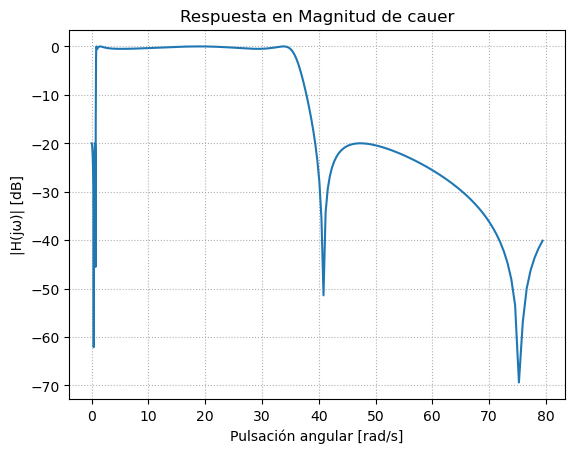

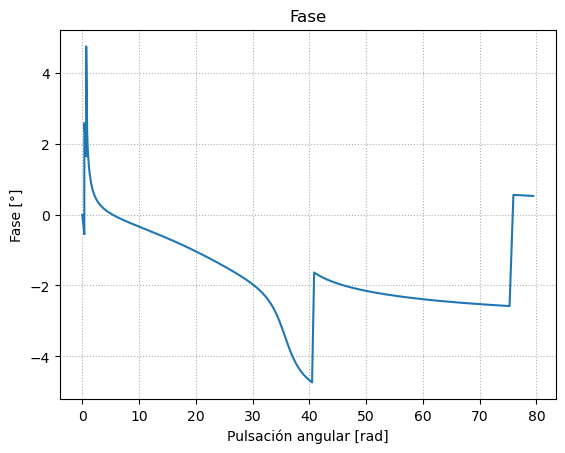

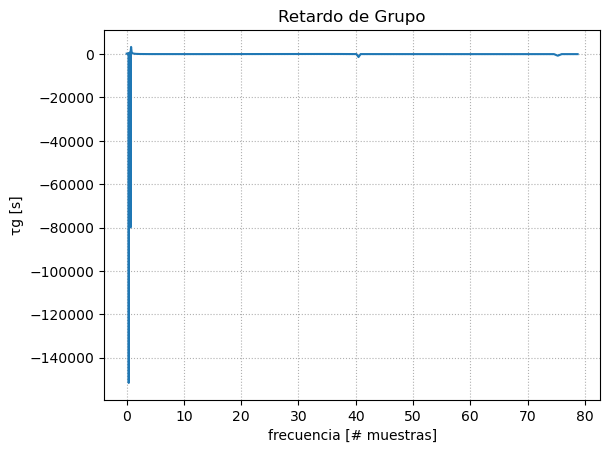

In [2]:
wcauer = np.logspace(-2, 1.9, 1000)
wcauer, hcauer = signal.freqz_sos(ni_sos_cauer, fs=fs, worN=wcauer) # w en Hz
wradcauer=wcauer/(fs/2)*np.pi # w en rad
# Fase y retardo de grupo
phasecauer = np.unwrap(np.angle(hcauer))
gdcauer = -np.diff(phasecauer) / np.diff(wradcauer)

# Magnitud
plt.figure()
plt.plot(wcauer, 20*np.log10(abs(hcauer)))
plt.title('Respuesta en Magnitud de cauer')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', ls=':')

# Fase
plt.figure()
plt.plot(wcauer, phasecauer)
plt.title('Fase')
plt.xlabel('Pulsación angular [rad]')
plt.ylabel('Fase [°]')
plt.grid(True, which='both', ls=':')

# Retardo de grupo
plt.figure()
plt.plot(wcauer[:-1], gdcauer)
plt.title('Retardo de Grupo')
plt.xlabel('frecuencia [# muestras]')
plt.ylabel('τg [s]')
plt.grid(True, which='both', ls=':')

A partir de los graficos se observa que el filtro cauer no tiene una una respuesta lineal en la banda de paso sino que presenta un leve rizado, para la fase se observa cambios bruscos pero en la banda de paso se observa una leve linealidad esto se nota en el retardo de grupo ya que en la banda de paso es constante pero presenta unos picos muy altos en la zona de transicion.


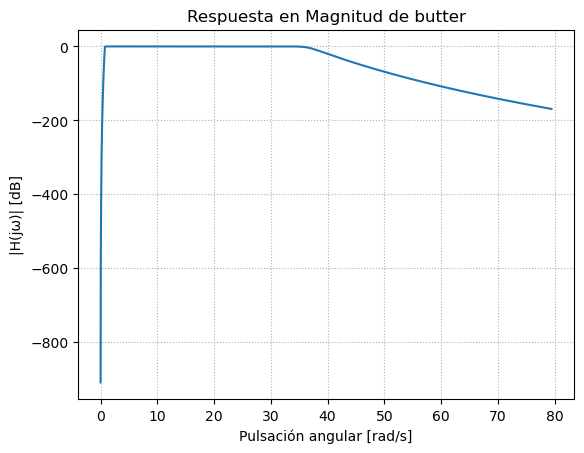

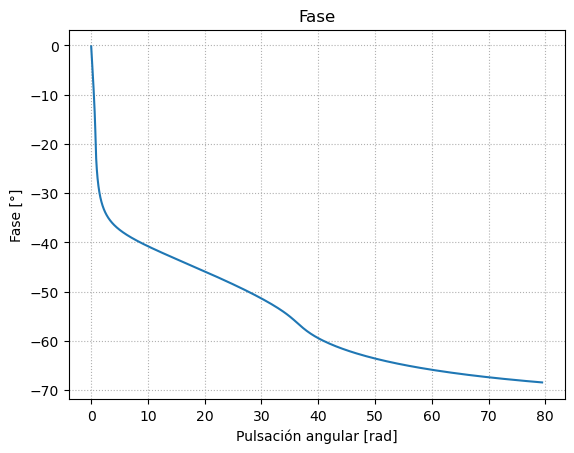

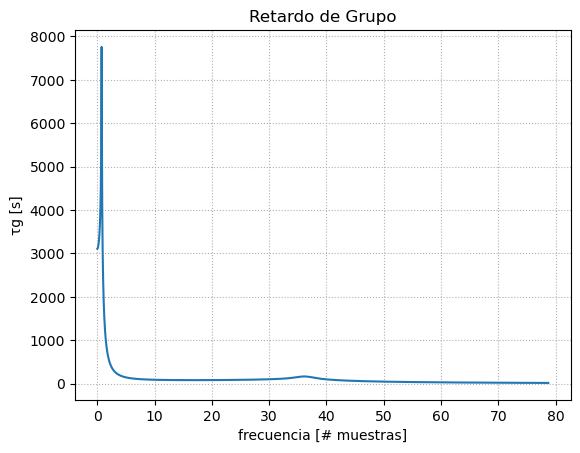

In [3]:
wbutter = np.logspace(-2, 1.9, 1000)
wbutter, hbutter = signal.freqz_sos(ni_sos_butter, fs=fs, worN=wbutter) # w en Hz
wradbutter=wbutter/(fs/2)*np.pi # w en rad
# Fase y retardo de grupo
phasebutter = np.unwrap(np.angle(hbutter))
gdbutter = -np.diff(phasebutter) / np.diff(wradbutter)

# Magnitud
plt.figure()
plt.plot(wbutter, 20*np.log10(abs(hbutter)))
plt.title('Respuesta en Magnitud de butter')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', ls=':')

# Fase
plt.figure()
plt.plot(wbutter, phasebutter)
plt.title('Fase')
plt.xlabel('Pulsación angular [rad]')
plt.ylabel('Fase [°]')
plt.grid(True, which='both', ls=':')

# Retardo de grupo
plt.figure()
plt.plot(wbutter[:-1], gdbutter)
plt.title('Retardo de Grupo')
plt.xlabel('frecuencia [# muestras]')
plt.ylabel('τg [s]')
plt.grid(True, which='both', ls=':')

Para el filtro butterworth se ve que una respuesta en magnitud lineal a diferencia del cauer, en la fase y el retardo se observa lo mismo , se podria decir que la fase presenta un comportamiento lineal que se ve reflejado en el retardo constante.

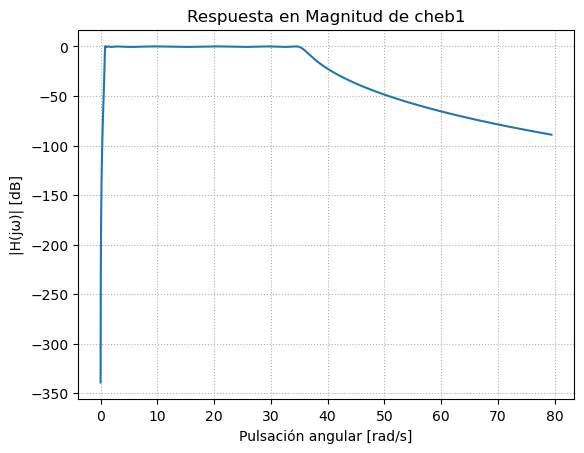

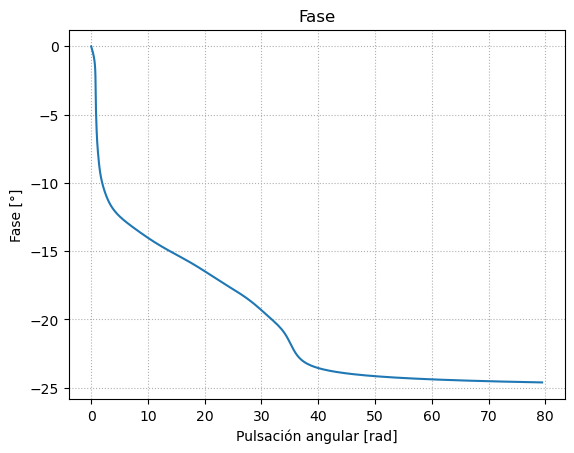

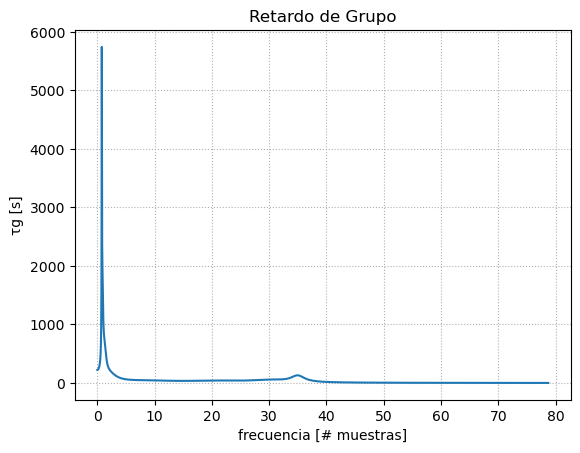

In [4]:
wcheb1 = np.logspace(-2, 1.9, 1000)
wcheb1, hcheb1 = signal.freqz_sos(ni_sos_cheb1, fs=fs, worN=wcheb1) # w en Hz
wradcheb1=wcheb1/(fs/2)*np.pi # w en rad
# Fase y retardo de grupo
phasecheb1 = np.unwrap(np.angle(hcheb1))
gdcheb1 = -np.diff(phasecheb1) / np.diff(wradcheb1)

# Magnitud
plt.figure()
plt.plot(wcheb1, 20*np.log10(abs(hcheb1)))
plt.title('Respuesta en Magnitud de cheb1')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', ls=':')

# Fase
plt.figure()
plt.plot(wcheb1, phasecheb1)
plt.title('Fase')
plt.xlabel('Pulsación angular [rad]')
plt.ylabel('Fase [°]')
plt.grid(True, which='both', ls=':')

# Retardo de grupo
plt.figure()
plt.plot(wcheb1[:-1], gdcheb1)
plt.title('Retardo de Grupo')
plt.xlabel('frecuencia [# muestras]')
plt.ylabel('τg [s]')
plt.grid(True, which='both', ls=':')

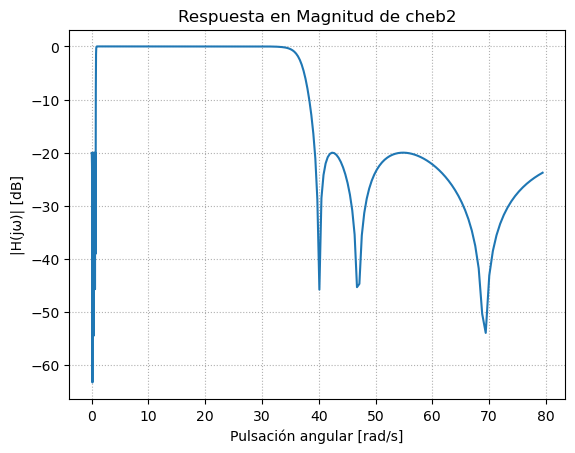

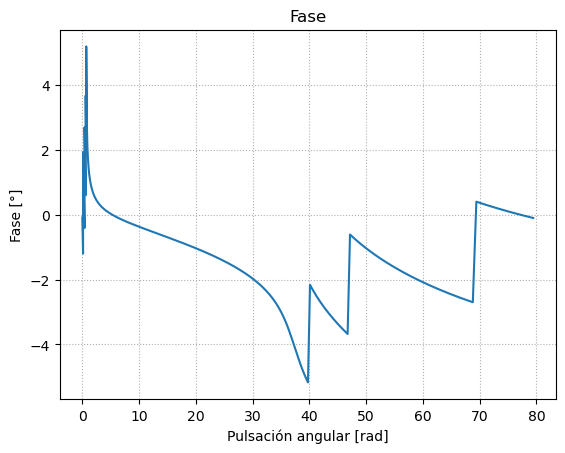

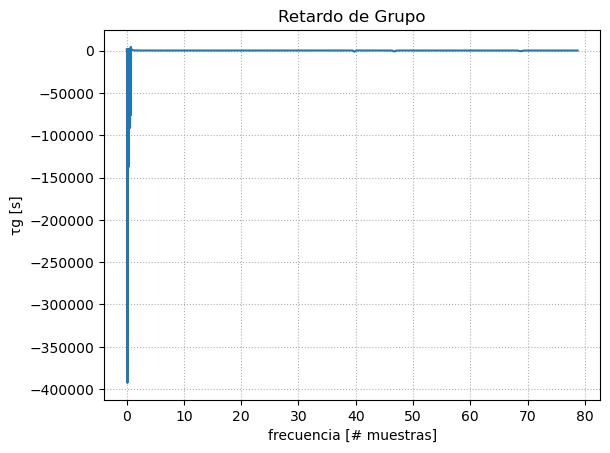

In [5]:
wcheb2 = np.logspace(-2, 1.9, 1000)
wcheb2, hcheb2 = signal.freqz_sos(ni_sos_cheb2, fs=fs, worN=wcheb2) # w en Hz
wradcheb2=wcheb2/(fs/2)*np.pi # w en rad
# Fase y retardo de grupo
phasecheb2 = np.unwrap(np.angle(hcheb2))
gdcheb2 = -np.diff(phasecheb2) / np.diff(wradcheb2)

# Magnitud
plt.figure()
plt.plot(wcheb2, 20*np.log10(abs(hcheb2)))
plt.title('Respuesta en Magnitud de cheb2')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', ls=':')

# Fase
plt.figure()
plt.plot(wcheb2, phasecheb2)
plt.title('Fase')
plt.xlabel('Pulsación angular [rad]')
plt.ylabel('Fase [°]')
plt.grid(True, which='both', ls=':')

# Retardo de grupo
plt.figure()
plt.plot(wcheb2[:-1], gdcheb2)
plt.title('Retardo de Grupo')
plt.xlabel('frecuencia [# muestras]')
plt.ylabel('τg [s]')
plt.grid(True, which='both', ls=':')

En la respuesta en módulo se observa que la banda de paso es prácticamente plana, sin rizado apreciable. En cambio, en la banda de rechazo aparecen muescas profundas debidas a los ceros de transmisión del filtro, lo que permite una buena atenuación de las altas frecuencias por encima de 40 Hz.La fase no es lineal y presenta discontinuidades (saltos bruscos) alrededor de las frecuencias donde aparecen las muescas en la banda de rechazo. Estos saltos están asociados a los ceros de transmisión del filtro y muestran que la aproximación Chebyshev II introduce una distorsión de fase significativa.El retardo de grupo presenta un pico muy grande cerca de las frecuencias bajas (debido a efectos numéricos en el cálculo) y luego, dentro de la banda de paso, se mantiene en valores acotados con una variación relativamente suave.

Introduzco ahora la ecg con ruido

In [6]:
mat_struct = sio.loadmat('./ECG_TP4.mat')
ecg_one_lead = mat_struct['ecg_lead'].flatten()  # asume shape (N,1) o (1,N)
N = len(ecg_one_lead)

Una vez introducido procedemos a filtrarlo 

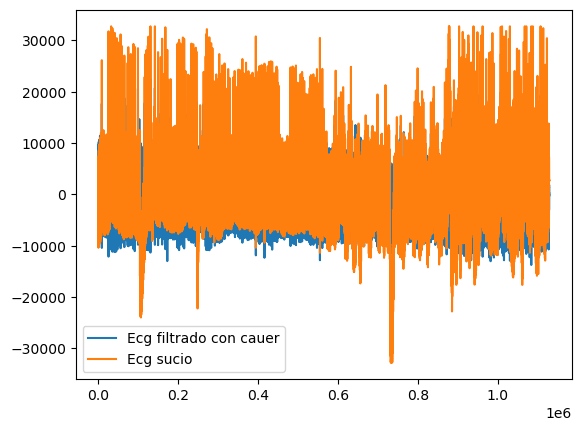

In [7]:
ecg_filt_cauer=signal.sosfilt(ni_sos_cauer, ecg_one_lead)

plt.figure()
plt.plot(ecg_filt_cauer, label='Ecg filtrado con cauer')
plt.plot(ecg_one_lead, label='Ecg sucio')
plt.legend()

    Como no podemos analizar nada de esta manera, recortaremos una parte de ambas ECG, la filtrada y las no filtradas para poder ver ques es lo que obtuvimos 

(-10000.0, 10500.0)

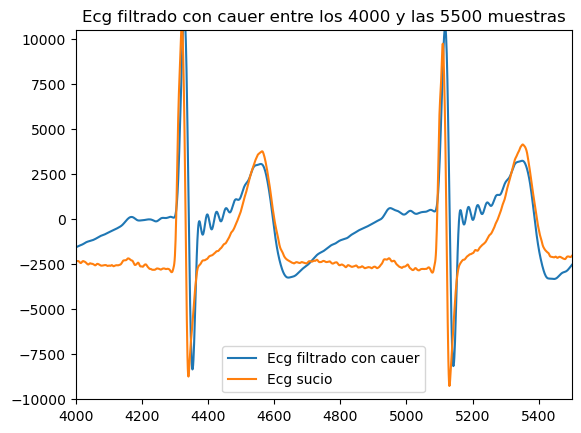

In [8]:
plt.figure()
plt.plot(ecg_filt_cauer, label='Ecg filtrado con cauer')
plt.plot(ecg_one_lead, label='Ecg sucio')
plt.legend()
plt.title('Ecg filtrado con cauer entre los 4000 y las 5500 muestras')
plt.xlim(4000,5500)
plt.ylim(-10000,10500)

Lo primero que se puede observar es que la señal filtrada se encuentra desfasada y reflejada. Esto puede deberse al desfase y al retardo de grupo no lineal característicos del tipo de filtro utilizado. Cuando se aplica un filtrado con este tipo de filtros, la señal de entrada x pasa a través de un sistema LTI, generando una salida y con una inversión de fase. Si se realizara un doble filtrado, se obtendría el módulo al cuadrado de la respuesta y una fase lineal, además de producirse una atenuación total equivalente al doble de la original. Dado que la atenuación de interés es de 40 dB, al inicio se indicó que corresponde a 40/2 dB por cada etapa de . Obteniendo asi el siguiente grafico 

(-10000.0, 10500.0)

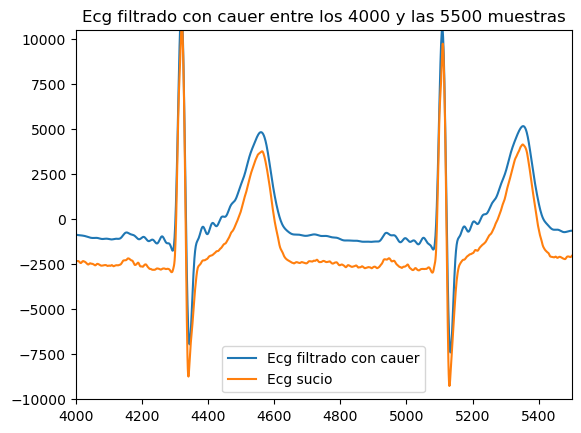

In [9]:
ecg_filt_cauer=signal.sosfiltfilt(ni_sos_cauer, ecg_one_lead)
plt.plot(ecg_filt_cauer, label='Ecg filtrado con cauer')
plt.plot(ecg_one_lead, label='Ecg sucio')
plt.legend()
plt.title('Ecg filtrado con cauer entre los 4000 y las 5500 muestras')
plt.xlim(4000,5500)
plt.ylim(-10000,10500)

Obteniendo asi un mejor filtro, ahora sabiendo esto para continuar con el infome analizaremos en distintas zonas de interes dadas por el profesor, el comportamiento de los filtros para poder determinar como este se comparta, tanto en la banda de stop, la banda de paso y la zonas de alta frecuencia.

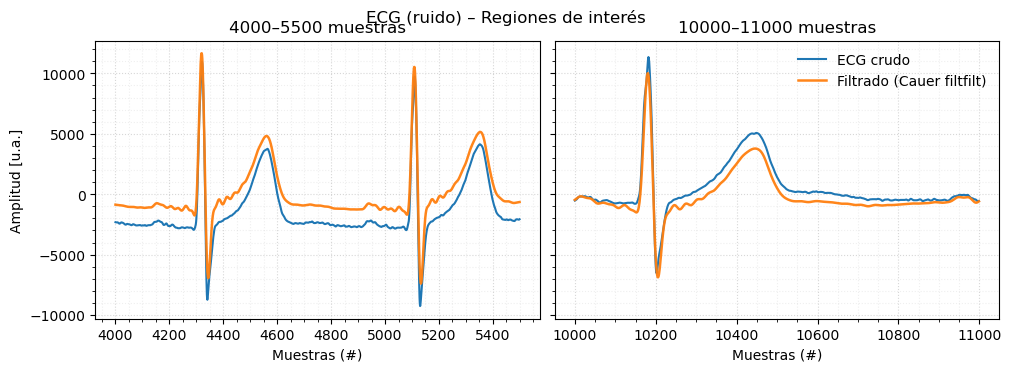

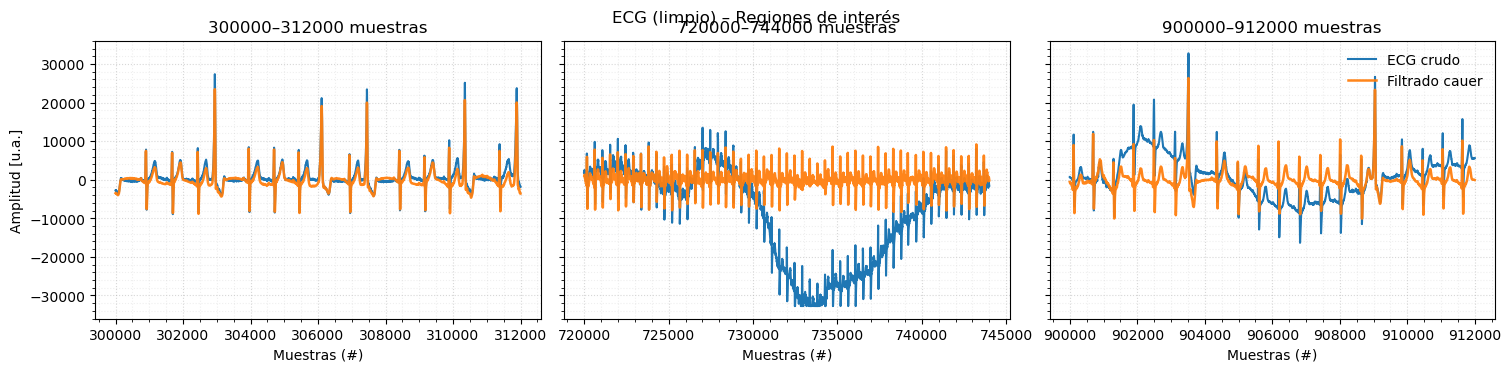

In [10]:
def _indices_roi(ii, N):
    i0 = int(max(0, np.floor(ii[0])))
    i1 = int(min(N, np.ceil(ii[1])))
    if i1 <= i0: i1 = min(N, i0+1)
    return i0, i1

def _dedup_legend(ax, loc='upper right'):
    # evita entradas repetidas en la leyenda
    handles, labels = ax.get_legend_handles_labels()
    seen = {}
    for h, l in zip(handles, labels):
        seen.setdefault(l, h)
    ax.legend(seen.values(), seen.keys(), frameon=False, loc=loc)

def _apply_delay_window(i0, i1, N, delay):
    """
    Recorta [i0, i1) para que 'idx' y 'idx+delay' sean válidos en [0, N).
    Devuelve: idx (np.arange recortado) e idx_filt = idx + delay.
    """
    # Si delay>0 corro la señal filtrada hacia la derecha: necesito idx <= N-1-delay
    # Si delay<0 corro hacia la izquierda: necesito idx >= -delay
    start = max(i0, max(0, -delay))
    stop  = min(i1, min(N, N - max(0, delay)))
    if stop <= start:
        # rango degenerado: devolveme un puntito válido para no crashear
        start = max(0, min(N-1, start))
        stop  = min(N, start+1)
    idx = np.arange(start, stop, dtype=int)
    idx_filt = idx + delay
    return idx, idx_filt

def _resolve_delay(delay_samples=None, delay_seconds=None, fs=1.0):
    if delay_seconds is not None:
        return int(np.round(delay_seconds * fs))
    return int(delay_samples or 0)

def plot_rois_samples(
    ecg_raw, ecg_filt, fs, regs_samples, title,
    *,
    delay_samples=None, delay_seconds=None,
    label_raw='ECG crudo', label_filt='Filtrado',
    legend_loc='upper right'
):
    """
    regs_samples: iterable de [i0, i1] en muestras
    delay_*: demora del filtro (positivo = desplaza la señal filtrada a la derecha)
    """
    N = len(ecg_raw)
    n = len(regs_samples)
    delay = _resolve_delay(delay_samples, delay_seconds, fs)

    fig, axs = plt.subplots(1, n, figsize=(5*n, 3.5), sharey=True, constrained_layout=True)
    if n == 1: axs = [axs]

    for ax, roi in zip(axs, regs_samples):
        i0, i1 = _indices_roi(roi, N)
        idx, idx_filt = _apply_delay_window(i0, i1, N, delay)

        ax.plot(idx,     ecg_raw[idx],   label=label_raw,  linewidth=1.5)
        ax.plot(idx,     ecg_filt[idx_filt], label=label_filt, linewidth=1.8, alpha=0.95)

        ax.set_title(f'{i0}–{i1} muestras')
        ax.set_xlabel('Muestras (#)')
        ax.grid(True, which='major', linestyle=':', alpha=0.5)
        ax.grid(True, which='minor', linestyle=':', alpha=0.2)
        ax.minorticks_on()

    axs[0].set_ylabel('Amplitud [u.a.]')
    fig.suptitle(title, y=1.02, fontsize=12)
    _dedup_legend(axs[-1], loc=legend_loc)
    plt.show()

def plot_rois_minutes(
    ecg_raw, ecg_filt, fs, regs_minutes, title,
    *,
    delay_samples=None, delay_seconds=None,
    label_raw='ECG crudo', label_filt='Filtrado',
    legend_loc='upper right'
):
    """
    regs_minutes: iterable de [min_ini, min_fin] en minutos
    """
    regs_samples = [np.array(r) * 60 * fs for r in regs_minutes]
    plot_rois_samples(
        ecg_raw, ecg_filt, fs, regs_samples, title,
        delay_samples=delay_samples, delay_seconds=delay_seconds,
        label_raw=label_raw, label_filt=label_filt, legend_loc=legend_loc
    )

# === Ejemplo de uso con tus variables ===
N = len(ecg_one_lead)
ecg_raw  = ecg_one_lead
ecg_filt = ecg_filt_cauer  

# --- ROIs en MUESTRAS (con ruido) ---
regs_ruido = (
    [4000, 5500],
    [10_000, 11_000],
)

# Caso 1: filtfilt (cero fase) → delay = 0 muestras
plot_rois_samples(
    ecg_raw, ecg_filt, fs, regs_ruido,
    title='ECG (ruido) – Regiones de interés',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado (Cauer filtfilt)',
    legend_loc='upper right'
)

# --- ROIs en MINUTOS (“limpio”) ---
regs_min = (
    [5.0, 5.2],
    [12.0, 12.4],
    [15.0, 15.2],
)

# Caso 2: filtro causal (ej. sosfilt) con retardo conocido, p.ej. 20 muestras
# (si preferís en segundos, usá delay_seconds=retardo_segundos)
plot_rois_minutes(
    ecg_raw, ecg_filt, fs, regs_min,
    title='ECG (limpio) – Regiones de interés',
    delay_samples=0,      
    label_raw='ECG crudo',
    label_filt='Filtrado cauer',
    legend_loc='upper right'
)

A continuación se aplicará el proceso de filtrado utilizando todos los tipos de filtros diseñados previamente. El objetivo es analizar y comparar el comportamiento de cada uno sobre la misma señal electrocardiográfica, evaluando su capacidad para eliminar el ruido sin alterar las componentes principales del ECG. Posteriormente, se graficarán las mismas regiones de interés, lo que permitirá observar las diferencias en la respuesta temporal y en la preservación de las características morfológicas de la señal original.

In [17]:
ecg_filt_butt=signal.sosfiltfilt(ni_sos_butter, ecg_one_lead)
ecg_filt_cheb1=signal.sosfiltfilt(ni_sos_cheb1, ecg_one_lead)
ecg_filt_cheb2=signal.sosfiltfilt(ni_sos_cheb2, ecg_one_lead)

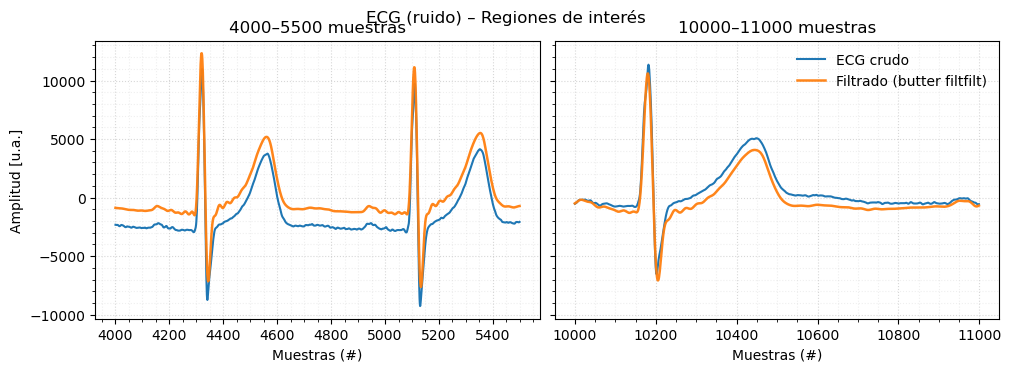

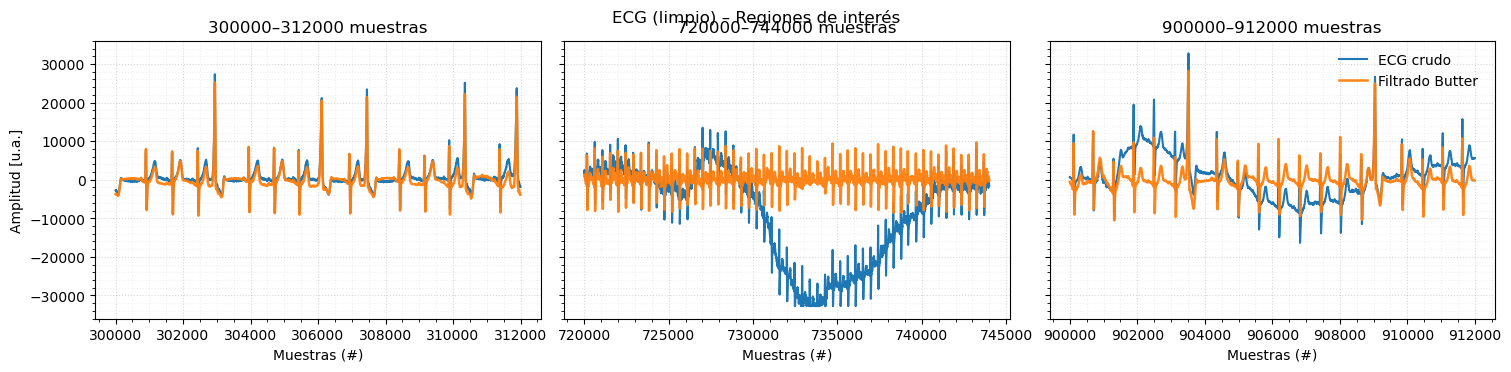

In [12]:

ecg_filt = ecg_filt_butt  

# --- ROIs en MUESTRAS (con ruido) ---
regs_ruido = (
    [4000, 5500],
    [10_000, 11_000],
)

# Caso 1: filtfilt (cero fase) → delay = 0 muestras
plot_rois_samples(
    ecg_raw, ecg_filt, fs, regs_ruido,
    title='ECG (ruido) – Regiones de interés',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado (butter filtfilt)',
    legend_loc='upper right'
)

# --- ROIs en MINUTOS (“limpio”) ---
regs_min = (
    [5.0, 5.2],
    [12.0, 12.4],
    [15.0, 15.2],
)

# Caso 2: filtro causal (ej. sosfilt) con retardo conocido, p.ej. 20 muestras
# (si preferís en segundos, usá delay_seconds=retardo_segundos)
plot_rois_minutes(
    ecg_raw, ecg_filt, fs, regs_min,
    title='ECG (limpio) – Regiones de interés',
    delay_samples=0,      
    label_raw='ECG crudo',
    label_filt='Filtrado Butter ',
    legend_loc='upper right'
)

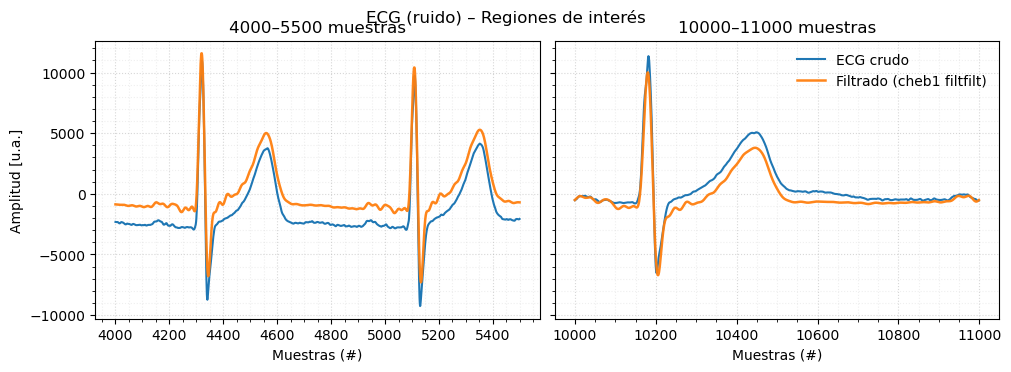

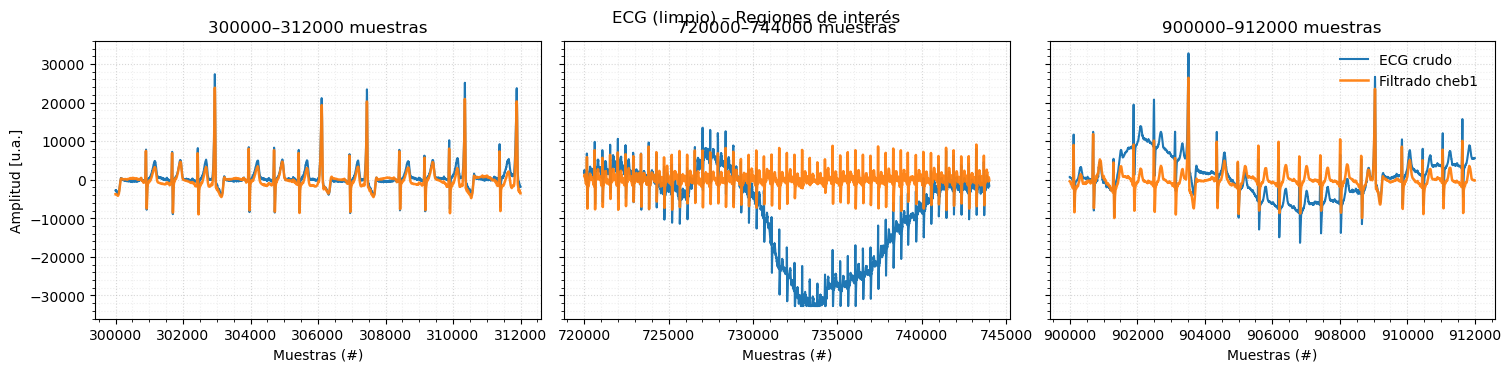

In [13]:

ecg_filt =ecg_filt_cheb1 

# --- ROIs en MUESTRAS (con ruido) ---
regs_ruido = (
    [4000, 5500],
    [10_000, 11_000],
)

# Caso 1: filtfilt (cero fase) → delay = 0 muestras
plot_rois_samples(
    ecg_raw, ecg_filt, fs, regs_ruido,
    title='ECG (ruido) – Regiones de interés',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado (cheb1 filtfilt)',
    legend_loc='upper right'
)

# --- ROIs en MINUTOS (“limpio”) ---
regs_min = (
    [5.0, 5.2],
    [12.0, 12.4],
    [15.0, 15.2],
)

# Caso 2: filtro causal (ej. sosfilt) con retardo conocido, p.ej. 20 muestras
# (si preferís en segundos, usá delay_seconds=retardo_segundos)
plot_rois_minutes(
    ecg_raw, ecg_filt, fs, regs_min,
    title='ECG (limpio) – Regiones de interés',
    delay_samples=0,      
    label_raw='ECG crudo',
    label_filt='Filtrado cheb1 ',
    legend_loc='upper right'
)

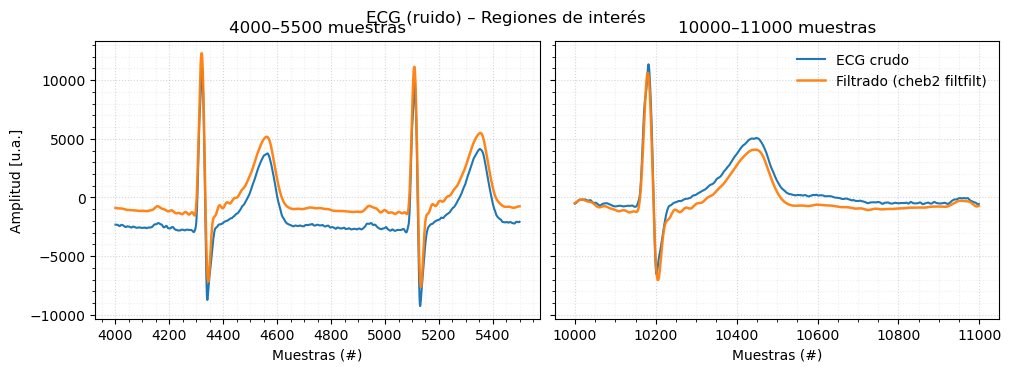

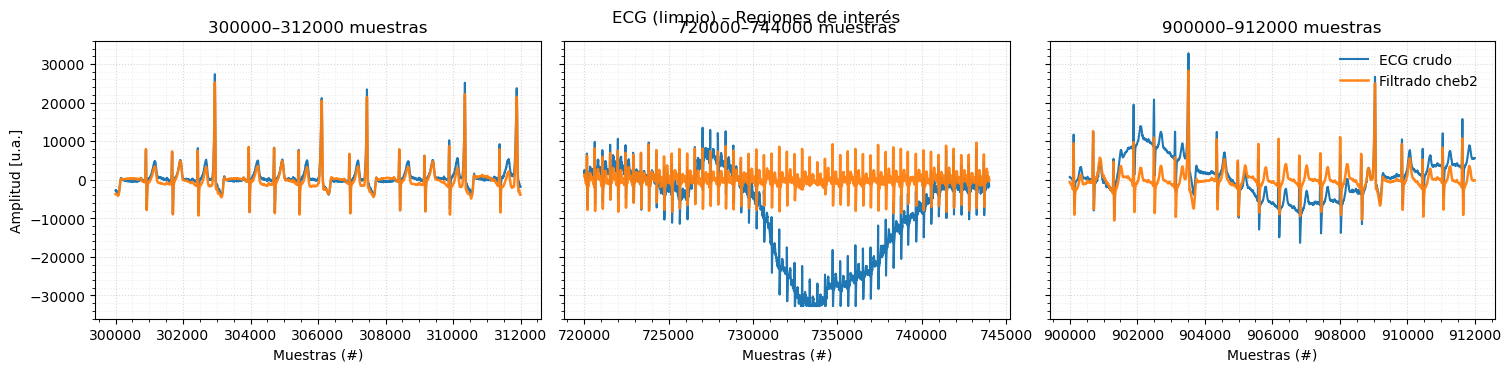

In [14]:

ecg_filt =ecg_filt_cheb2

# --- ROIs en MUESTRAS (con ruido) ---
regs_ruido = (
    [4000, 5500],
    [10_000, 11_000],
)

# Caso 1: filtfilt (cero fase) → delay = 0 muestras
plot_rois_samples(
    ecg_raw, ecg_filt, fs, regs_ruido,
    title='ECG (ruido) – Regiones de interés',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado (cheb2 filtfilt)',
    legend_loc='upper right'
)

# --- ROIs en MINUTOS (“limpio”) ---
regs_min = (
    [5.0, 5.2],
    [12.0, 12.4],
    [15.0, 15.2],
)

# Caso 2: filtro causal (ej. sosfilt) con retardo conocido, p.ej. 20 muestras
# (si preferís en segundos, usá delay_seconds=retardo_segundos)
plot_rois_minutes(
    ecg_raw, ecg_filt, fs, regs_min,
    title='ECG (limpio) – Regiones de interés',
    delay_samples=0,      
    label_raw='ECG crudo',
    label_filt='Filtrado cheb2 ',
    legend_loc='upper right'
)

Los cuatro filtros cumplen la plantilla en frecuencia , reduciendo el movimiento de línea de base y buena parte del ruido de alta frecuencia del ECG.

Butterworth presenta una pasabanda prácticamente plana y, al aplicarse con filtfilt, no introduce retardo de fase. En el dominio temporal es el que mejor preserva la forma del ECG , aunque deja algo más de ruido residual que los demás.

Chebyshev I logra una atenuación del ruido mayor que Butterworth gracias a una transición más rápida. Sin embargo, el rizado en pasabanda se traduce en pequeñas variaciones de amplitud entre latidos, por lo que la señal filtrada comienza a diferenciarse más del ECG original.

Chebyshev II y Cauer son los filtros más agresivos: proporcionan el mejor rechazo de ruido y de componentes fuera de banda, pero a costa de una mayor distorsión de la forma de onda, especialmente en los complejos QRS y en el segmento ST. Esto se ve claramente en las regiones de interés donde el trazado filtrado se separa más del crudo.

Es de interés analizar el comportamiento de los filtros FIR. Para ello se utilizará la función firwin2 perteneciente a la librería signal. Esta función permite diseñar filtros FIR a partir de una respuesta en frecuencia deseada y requiere definir una serie de parámetros importantes.

El primer parámetro es numtaps, que indica el número de coeficientes o “taps” del filtro. Este valor suele ser elevado, ya que un mayor número de coeficientes permite obtener una mejor aproximación a la respuesta ideal, aunque también incrementa el costo computacional.

El parámetro freq corresponde a un arreglo que contiene las frecuencias de diseño, las cuales deben ir desde 0 hasta la frecuencia de Nyquist. En gain se especifica la ganancia del filtro en cada punto de frecuencia definido en freq.

El argumento window permite seleccionar la ventana que se aplicará para obtener la respuesta en frecuencia. Es de interés analizar cómo la elección de la ventana y la forma de sus lóbulos afectan la respuesta en frecuencia del filtro.

Finalmente, nfreqs determina el tamaño de la malla de interpolación utilizada para construir el filtro, y fs representa la frecuencia de muestreo de la señal ECG que se desea filtrar. 

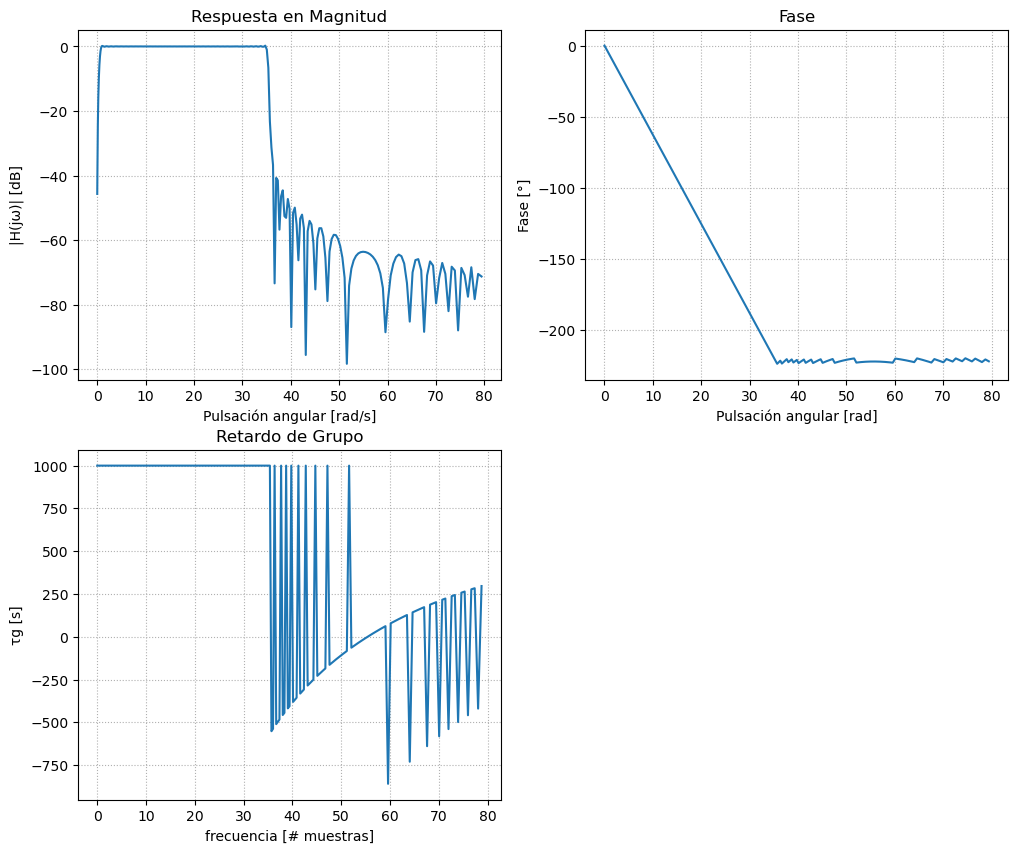

In [15]:
wp = [0.8,35]   # banda de pa so (Hz) # contar como modificar la banda de paso y la banda de stop para que tengan el mismo cambio mejora el filtro
ws = [0.1,35.7]  # banda de stop (Hz)
frecuencia=np.sort(np.concatenate(((0, fs/2), wp, ws) ))
deseado = [0,0,1,1,0,0]
numtaps=2000#cantidad de coeficientes 
retardo=(numtaps-1)//2
fir_win_rect=signal.firwin2(numtaps=numtaps, freq=frecuencia, gain=deseado, window='boxcar',nfreqs= int(np.ceil(np.sqrt(numtaps)*8))**2-1,fs=fs) #probar distitas ventanas de labulos mas anchos y mostrar que el filtro empeora
# Respuesta en frecuencia
w = np.logspace(-2, 1.9, 1000)
w, h = signal.freqz(fir_win_rect, fs=fs, worN=w) 
wrad=w/(fs/2)*np.pi # w en rad
# Fase y retardo de grupo
phase = np.unwrap(np.angle(h))
gd = -np.diff(phase) / np.diff(wrad)

#--- Gráficas ---
plt.figure(figsize=(12,10))

# Magnitud
plt.subplot(2,2,1)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Respuesta en Magnitud')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', ls=':')

# Fase
plt.subplot(2,2,2)
plt.plot(w, phase)
plt.title('Fase')
plt.xlabel('Pulsación angular [rad]')
plt.ylabel('Fase [°]')
plt.grid(True, which='both', ls=':')

# Retardo de grupo
plt.subplot(2,2,3)
plt.plot(w[:-1], gd)
plt.title('Retardo de Grupo')
plt.xlabel('frecuencia [# muestras]')
plt.ylabel('τg [s]')
plt.grid(True, which='both', ls=':')


pedir al profe que nos explique como descargar la plantilla de diseño asi modificamos el filtro hasta tener el que queremos 

contar un poco de filtro de cudrados minimos y parks-mc clellan-remez y aplicarlo 

Diseño de filtro por cuadrados minimos:

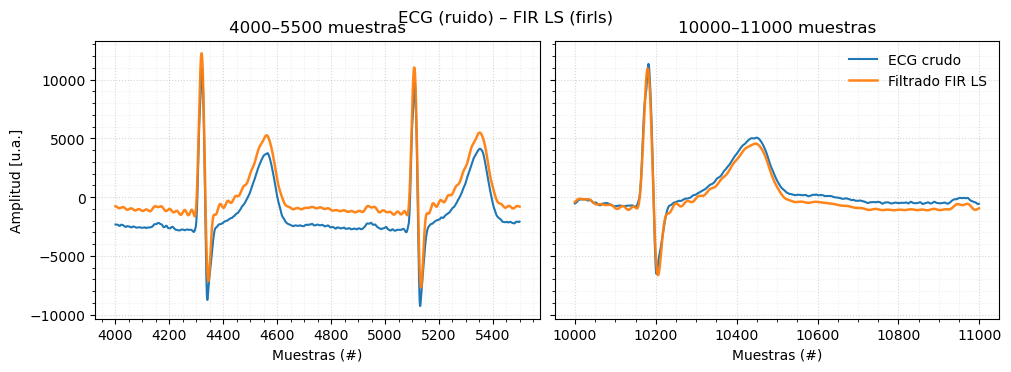

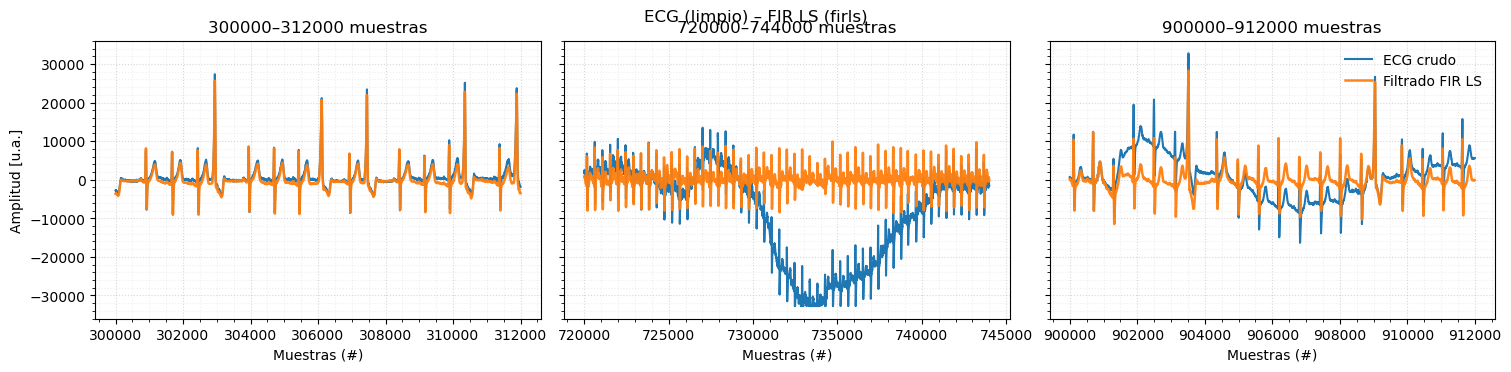

In [19]:
numtaps = 2001   # cantidad de coeficientes 

bands_ls   = [0, ws[0], wp[0], wp[1], ws[1], fs/2]
desired_ls = [0,   0,    1,    1,    0,   0]

h_firls = signal.firls(numtaps, bands_ls, desired_ls, fs=fs)

ecg_raw = ecg_one_lead


ecg_filt_cauer = signal.sosfilt(ni_sos_cauer, ecg_raw)
ecg_filt_butt  = signal.sosfiltfilt(ni_sos_butter, ecg_raw)
ecg_filt_cheb1 = signal.sosfiltfilt(ni_sos_cheb1, ecg_raw)
ecg_filt_cheb2 = signal.sosfiltfilt(ni_sos_cheb2, ecg_raw)

ecg_filt_firls = signal.filtfilt(h_firls, [1], ecg_raw)



regs_ruido = (
    [4000, 5500],
    [10_000, 11_000],
)


regs_min = (
    [5.0, 5.2],
    [12.0, 12.4],
    [15.0, 15.2],
)


plot_rois_samples(
    ecg_raw, ecg_filt_firls, fs, regs_ruido,
    title='ECG (ruido) – FIR LS (firls)',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado FIR LS',
    legend_loc='upper right'
)


plot_rois_minutes(
    ecg_raw, ecg_filt_firls, fs, regs_min,
    title='ECG (limpio) – FIR LS (firls)',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado FIR LS',
    legend_loc='upper right'
)


El filtro FIR diseñado mediante el método de mínimos cuadrados,reduce de forma apreciable el ruido de alta frecuencia y atenúa el movimiento de la línea de base del ECG. En las regiones ruidosas la señal filtrada presenta segmentos isoeléctricos más suaves, mientras que la forma de los complejos QRS se conserva prácticamente sin cambios.

Diseño de filtro Parks–McClellan (Remez)

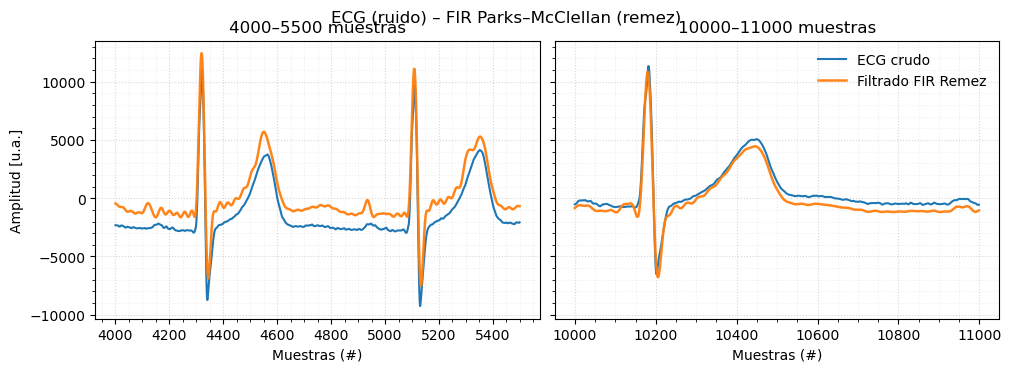

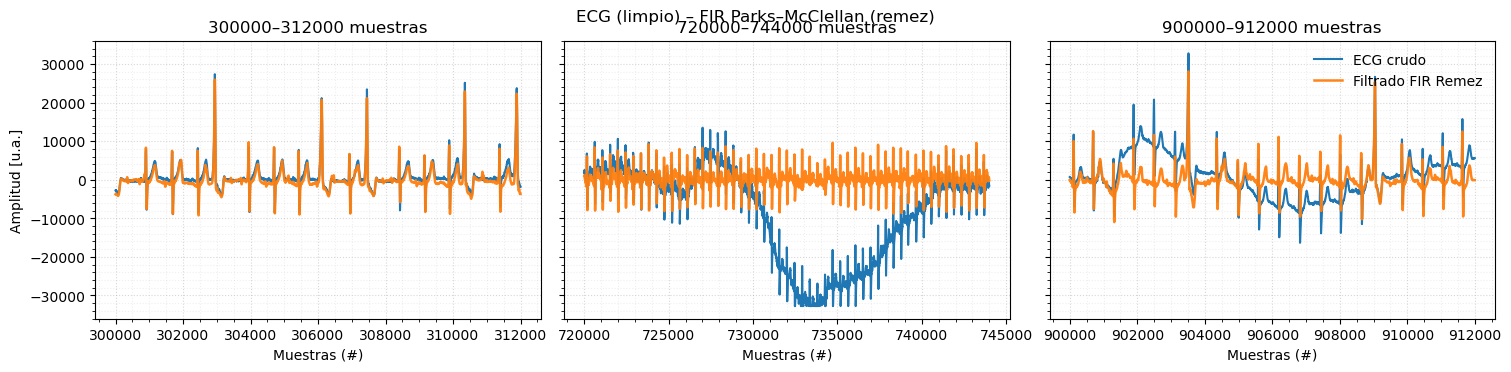

In [21]:
numtaps = 2001   

bands_pm   = [0, ws[0], wp[0], wp[1], ws[1], fs/2]
desired_pm = [0, 1, 0]         
weights_pm = [10, 1, 10]       # más peso en stopbands

h_remez = signal.remez(numtaps, bands_pm, desired_pm,
                       weight=weights_pm, fs=fs)


ecg_raw = ecg_one_lead

# FIR Parks–McClellan (fase lineal) + filtfilt → sin delay
ecg_filt_remez = signal.filtfilt(h_remez, [1], ecg_raw)



regs_ruido = (
    [4000, 5500],
    [10_000, 11_000],
)


regs_min = (
    [5.0, 5.2],
    [12.0, 12.4],
    [15.0, 15.2],
)


plot_rois_samples(
    ecg_raw, ecg_filt_remez, fs, regs_ruido,
    title='ECG (ruido) – FIR Parks–McClellan (remez)',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado FIR Remez',
    legend_loc='upper right'
)


plot_rois_minutes(
    ecg_raw, ecg_filt_remez, fs, regs_min,
    title='ECG (limpio) – FIR Parks–McClellan (remez)',
    delay_samples=0,
    label_raw='ECG crudo',
    label_filt='Filtrado FIR Remez',
    legend_loc='upper right'
)

En las regiones ruidosas, el FIR Parks–McClellan reduce de forma significativa el ruido de alta frecuencia y el movimiento de la línea de base, manteniendo la localización temporal de los complejos QRS y conservando razonablemente su morfología.

### Conclusiones:


Se estudiaron los filtros IIR de tipo Cauer, Chebyshev I y II y Butterworth, analizando su respuesta en magnitud, fase y retardo de grupo, y observando su comportamiento frente a una señal real: un registro de ECG. Se verificó que los filtros con transiciones más abruptas (Cauer y Chebyshev II) son los más agresivos en la atenuación de las componentes de alta frecuencia en la banda de rechazo, pero también son los que más distorsionan la forma de la señal en la banda de paso. En cambio, el filtro Butterworth resulta más conservador con la morfología del ECG, a costa de una menor atenuación del ruido.

Además, se compararon dos diseños FIR: uno obtenido por el método de mínimos cuadrados y otro mediante el algoritmo de Parks–McClellan (remez). El diseño por mínimos cuadrados produjo un filtrado más suave, con buena preservación de la forma de los latidos, mientras que el filtro Parks–McClellan logró mayores niveles de atenuación fuera de banda, a costa de un rizado algo más pronunciado en la amplitud, coherente con las características equirriple de este tipo de diseño.

### Autoevaluación del aprendizaje


Autoevaluación del aprendizaje

Indicar una opción:

Resolví la tarea, pero tengo dudas, del bonus






Responder:
¿Qué aprendiste al hacer esta tarea? 
¿Qué te quedó claro? 
¿Qué te sigue costando? 

Indicar si se utilizó IA:
Sí, usé chatGPT.
En caso afirmativo, indicar una opción o varias:
Escritura: Me ayudó a mejorar la coherencia y la cohesión de mis textos, además de corregir faltas de ortografía, ya que en este editor de texto no cuento con las líneas rojas que me indiquen si escribí algo mal. Generalmente lo utilizo con ese propósito.